# Sleep Disorder Data Analysis

This notebook explores the **Sleep Disorder Diagnosis Dataset**, which contains health and lifestyle data from 374 individuals.  
The main objective is to analyze how physical activity levels affect sleep quality, and to uncover patterns that may help in understanding or managing sleep disorders such as **Insomnia** and **Sleep Apnea**.


## Dataset Preview

The table below shows the first few entries from the **Sleep Disorder Diagnosis Dataset**.  
Each row represents an individual, with attributes including:

- **Demographics**: Person ID, Gender, Age, Occupation  
- **Sleep Metrics**: Sleep Duration, Quality of Sleep  
- **Lifestyle Factors**: Physical Activity Level, Stress Level, Daily Steps  
- **Health Indicators**: BMI Category, Blood Pressure, Heart Rate  
- **Diagnosis**: Sleep Disorder (e.g., Insomnia, Sleep Apnea, or None)

This helps us understand the structure and types of data we'll be analyzing.


In [3]:
import pandas as pd

# Load the dataset from the current folder
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

# Preview the first few rows
df.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
# Basic info
df.info()

# Check for missing values
df.isna().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


## Sleep Disorder Distribution

The chart below shows the number of individuals diagnosed with each sleep disorder in the dataset.  
The two categories represented are:

- **Sleep Apnea**: Characterized by breathing interruptions during sleep, often linked to cardiovascular risks.
- **Insomnia**: Difficulty falling or staying asleep, leading to poor sleep quality and fatigue.

Both disorders appear to be nearly identical showing a close balanced representation with Sleep Apnea being slighly higher.  
This distribution provides a insight for comparing how lifestyle factors — such as physical activity — may influence sleep quality across different disorder types.


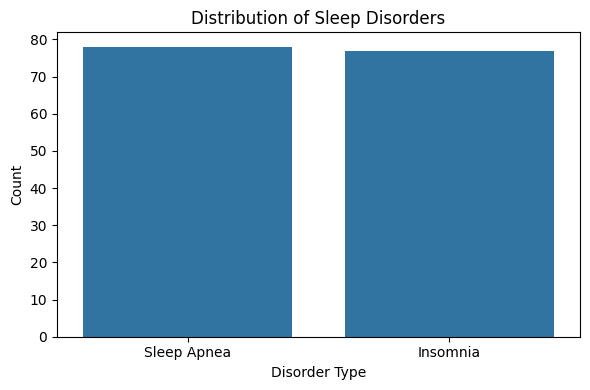

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each sleep disorder
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sleep Disorder')
plt.title('Distribution of Sleep Disorders')
plt.xlabel('Disorder Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [6]:
df.columns


Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [7]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


## Sleep Quality vs. Physical Activity Level

The chart underneath illustrates the relationship between **physical activity level** and **average sleep quality** across individuals in the dataset.  
Each bar represents the average sleep quality score for a given activity level, with error bars showing the standard deviation.

### Key Observations:
- Sleep quality generally improves as physical activity increases.
- The highest sleep quality scores are observed at activity levels between **75 and 85**.
- A slight dip occurs at level 90, suggesting there may be a threshold beyond which additional activity doesn't yield further sleep benefits.

This trend supports the idea that **moderate to high physical activity** benefits sleep health in some way.


C:\Users\baile\AppData\Local\Temp\ipykernel_12856\956149008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


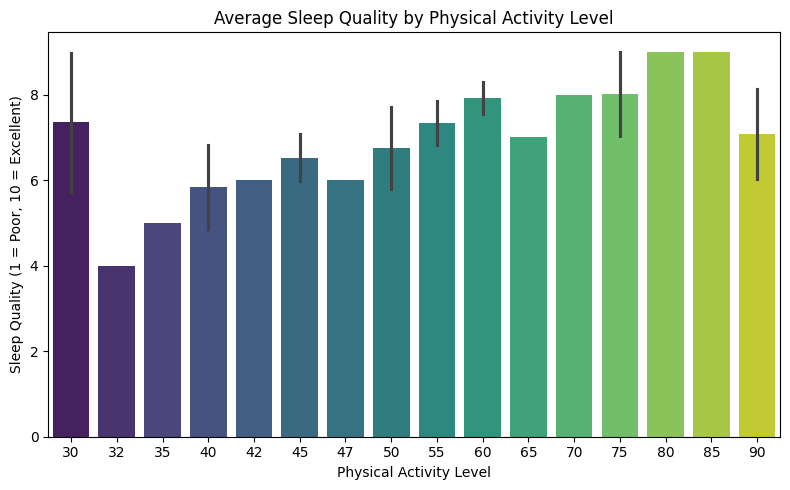

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='physical_activity_level',
    y='quality_of_sleep',
    estimator='mean',
    errorbar='sd',
    palette='viridis'
)
plt.title('Average Sleep Quality by Physical Activity Level')
plt.xlabel('Physical Activity Level')
plt.ylabel('Sleep Quality (1 = Poor, 10 = Excellent)')
plt.tight_layout()
plt.show()


## Gender Comparison of Sleep Disorders

The chart below compares the number of individuals diagnosed with each sleep disorder by gender.

### Key Observations:
- **Sleep Apnea** appears more frequently among **males**, suggesting a potential gender-linked risk factor.
- **Insomnia** shows a more balanced distribution, with similar counts across genders.

These insights can guide further analysis into whether lifestyle or physiological factors contribute to gender differences in sleep disorder prevalence.



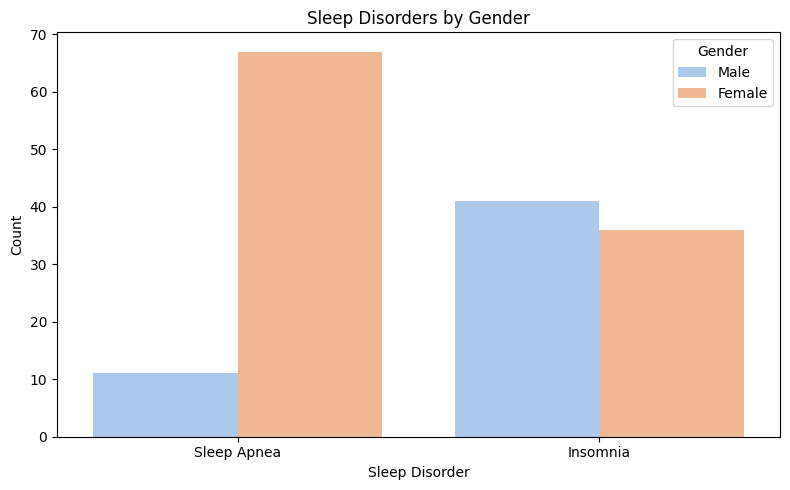

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out missing sleep disorder entries
disorder_by_gender = df.dropna(subset=['sleep_disorder'])

# Create bar chart
plt.figure(figsize=(8,5))
sns.countplot(
    data=disorder_by_gender,
    x='sleep_disorder',
    hue='gender',
    palette='pastel'
)
plt.title('Sleep Disorders by Gender')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()




## Dataset Overview

This dataset captures a wide range of **health and lifestyle metrics** for individuals, with a focus on sleep quality and disorders.  
Each row represents someone, and the columns include:

- **Demographics**: Gender, Age, Occupation  
- **Sleep Metrics**: Sleep Duration, Quality of Sleep, Sleep Disorder  
- **Lifestyle Factors**: Physical Activity Level, Stress Level, Daily Steps  
- **Health Indicators**: BMI Category, Blood Pressure, Heart Rate

However, the `sleep_disorder` column contains missing values, which may represent individuals without a diagnosis or unreported cases.  
This structure allows us to explore how lifestyle and physiological factors correlate with sleep health — and potentially identify patterns that distinguish those with sleep disorders from those without.


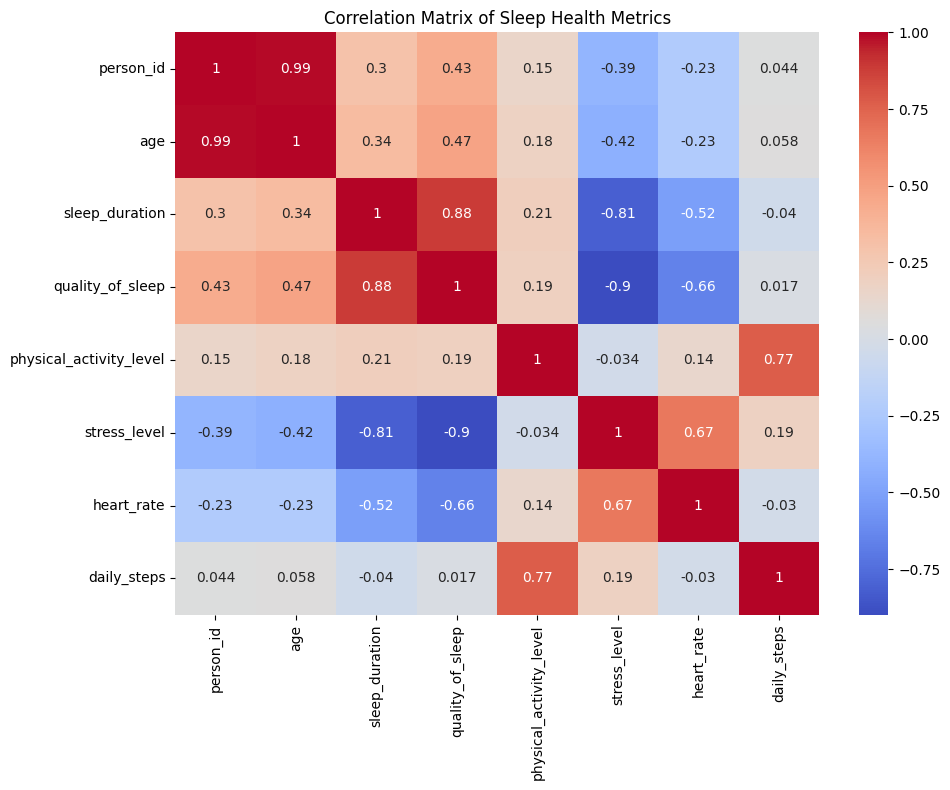

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sleep Health Metrics')
plt.tight_layout()
plt.show()



## Conclusion

In conclusion, the analysis shows that **being active** and having **less stress** helps people sleep better.  
People with **Insomnia** seem to benefit more from healthy habits like exercise and stress control.  
On the other hand, **Sleep Apnea** doesn’t improve as much with lifestyle changes — it may require medical treatment.

We also found that **men are more likely to have Sleep Apnea**, while **Insomnia affects both men and women equally**.  
These findings suggest that different sleep disorders may need different types of support or care.

This project shows how data can help us understand sleep problems and find ways to improve sleep health.
